# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [ ]:
# What are the "type" of each column? 

df_titanic.dtypes

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [ ]:
# First exploration:

df_titanic.describe()


,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.00000
mean,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.836662,14.121908,1.104669,0.807466,49.78204
min,1.000000,0.420000,0.000000,0.000000,0.00000
25%,2.000000,20.250000,0.000000,0.000000,7.92500
50%,3.000000,28.000000,0.000000,0.000000,14.45420
75%,3.000000,38.000000,1.000000,0.000000,31.13750
max,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


<Figure size 720x576 with 0 Axes>

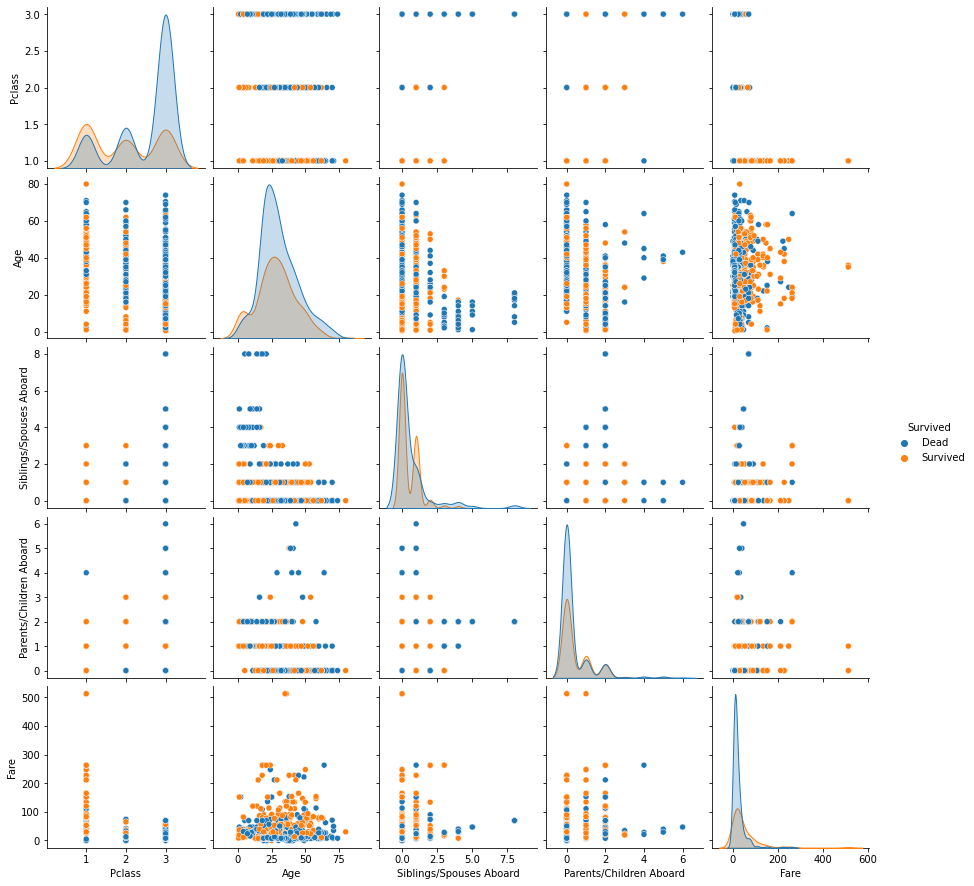

In [ ]:
# Pairplots

plt.figure(figsize = (10, 8))

sns.pairplot(df_titanic, hue = 'Survived')

plt.show()

In [ ]:
# Correlation Heatmaps :

df_titanic.corr()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,-0.548919,0.112329,0.158839,0.215470,1.000000


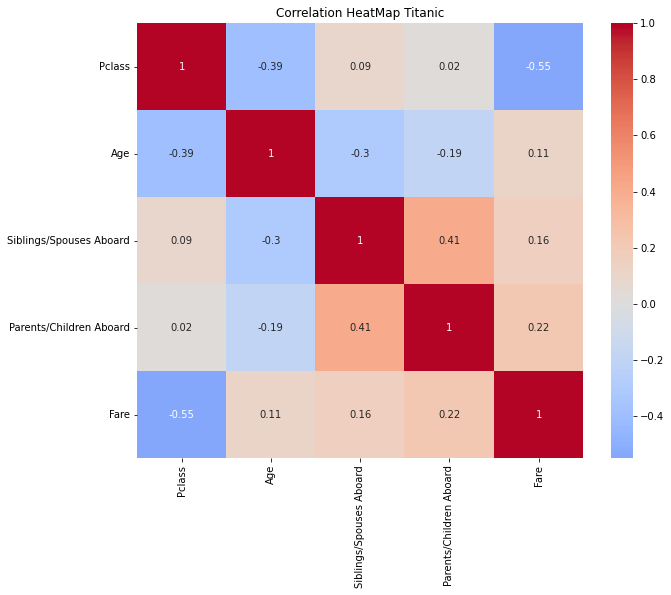

In [ ]:
plt.figure(figsize = (10, 8))

sns.heatmap(round(df_titanic.corr(), 2), annot = True, cmap = 'coolwarm', center = 0)
plt.title("Correlation HeatMap Titanic")

plt.show()

You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?

df_titanic[df_titanic["Name"].str.contains('Jack')]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
762,Dead,1,Dr. Arthur Jackson Brewe,male,46.0,0,0,39.6


Il n'y en a qu'un et il s'appelle en fait Jackson.

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
# Select features (X) with only numeric values, and without "Survived" column
# Select "Survived" column as target (y)

X = df_titanic[["Fare", "Age", "Parents/Children Aboard", "Siblings/Spouses Aboard", "Pclass"]]
y = df_titanic['Survived']


In [ ]:
# Split your data with random_state = 36

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 887
The length of the train dataset is   : 665
The length of the test dataset is    : 222


In [ ]:
# Train a logistic regression :

model = LogisticRegression().fit(X_train, y_train)

In [ ]:
# Print the accuracy score on the train set and on the test set. Is there overfitting?

print("\nScore of Train dataset :", model.score(X_train, y_train))
print("Score of Test dataset :", model.score(X_test, y_test))


Score of Train dataset : 0.718796992481203
Score of Test dataset : 0.6441441441441441


Pas d'overfitting !

In [ ]:
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        Dead       0.74      0.86      0.79       416
    Survived       0.67      0.49      0.57       249

    accuracy                           0.72       665
   macro avg       0.70      0.67      0.68       665
weighted avg       0.71      0.72      0.71       665

              precision    recall  f1-score   support

        Dead       0.65      0.84      0.73       129
    Survived       0.63      0.37      0.46        93

    accuracy                           0.64       222
   macro avg       0.64      0.61      0.60       222
weighted avg       0.64      0.64      0.62       222



In [ ]:
# Print the Confusion Matrix on the test set :

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")


,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,109,20
Survived ACTUAL,59,34


In [ ]:
# How many iterations were needed to train this model ? 

model.n_iter_

array([55], dtype=int32)

55 itérations.

In [ ]:
# Prediction des probabilités (FACULTATIF) :

model.predict_proba(X_test.iloc[:5,:])

array([[0.51805276, 0.48194724],
       [0.84989964, 0.15010036],
       [0.74912387, 0.25087613],
       [0.47881237, 0.52118763],
       [0.86678898, 0.13321102]])

In [ ]:
# Ordre des classes (FACULTATIF) :

model.classes_

array(['Dead', 'Survived'], dtype=object)

# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
# Change the weight of the classes :
# Fit the model on train set :

model_weight = LogisticRegression(class_weight = {'Dead' : 10})
model_weight.fit(X_train, y_train)


LogisticRegression(class_weight={'Dead': 10})

In [ ]:
# Print the accuracy score on the train set and on the test set :

print("Acc. score on the train set : " , model_weight.score(X_train, y_train))
print("Acc. score on the train set : " , model_weight.score(X_test, y_test))

Acc. score on the train set :  0.6300751879699248
Acc. score on the train set :  0.5900900900900901


In [ ]:
# Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_weight.predict(X_test)),
             index = model_weight.classes_ + " ACTUAL",
             columns = model_weight.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,129,0
Survived ACTUAL,91,2


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# Compute the prediction probabilities on your test set :

pred_model_risk = model.predict_proba(X_test)
pred_model_risk

array([[0.51805276, 0.48194724],
       [0.84989964, 0.15010036],
       [0.74912387, 0.25087613],
       [0.47881237, 0.52118763],
       [0.86678898, 0.13321102],
       [0.72075768, 0.27924232],
       [0.77991189, 0.22008811],
       [0.81835507, 0.18164493],
       [0.1802827 , 0.8197173 ],
       [0.75171901, 0.24828099],
       [0.75985315, 0.24014685],
       [0.42905176, 0.57094824],
       [0.42297257, 0.57702743],
       [0.72130047, 0.27869953],
       [0.74133027, 0.25866973],
       [0.65381139, 0.34618861],
       [0.71743912, 0.28256088],
       [0.26329091, 0.73670909],
       [0.81329463, 0.18670537],
       [0.70827197, 0.29172803],
       [0.80423249, 0.19576751],
       [0.46647094, 0.53352906],
       [0.66231813, 0.33768187],
       [0.34060679, 0.65939321],
       [0.57903752, 0.42096248],
       [0.79874001, 0.20125999],
       [0.3658046 , 0.6341954 ],
       [0.79826716, 0.20173284],
       [0.91156992, 0.08843008],
       [0.49553841, 0.50446159],
       [0.

In [ ]:
# Which column is about "survived" probability?

model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
# Among the previous prediction probability array, select only the column corresponding to the "Survived" probability

df_test = pd.DataFrame(pred_model_risk[:,1], columns = ['Proba Survived'], index = y_test.index)
df_test

,Proba Survived
346,0.481947
458,0.150100
878,0.250876
618,0.521188
178,0.133211
...,...
345,0.117263
693,0.094634
423,0.382791
19,0.248261


In [ ]:
# Display the passengers by sorting most likely to survive first (sorted_values() method?)

# Merge pour ajouter la colonne Proba Survived au DF :

df_test_proba_risk = df_titanic.merge(df_test, how = 'inner', left_index = True, right_index = True)
df_test_proba_risk

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Proba Survived
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0.611654
5,Dead,3,Mr. James Moran,male,27.0,0,0,8.4583,0.203440
8,Survived,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,0.329359
13,Dead,3,Mr. Anders Johan Andersson,male,39.0,1,5,31.2750,0.352001
14,Dead,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542,0.335005
...,...,...,...,...,...,...,...,...,...
878,Dead,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167,0.250876
880,Dead,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500,0.219943
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0.459719
883,Survived,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0.819717


In [ ]:
# Display the passengers by sorting most likely to survive first (sorted_values() method?)

df_test_proba_risk.sort_values('Proba Survived', ascending = False)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Proba Survived
303,Survived,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500,0.964493
733,Survived,1,Mr. Gustave J Lesurer,male,35.00,0,0,512.3292,0.938262
547,Survived,1,Mr. John Borland Jr Thayer,male,17.00,0,2,110.8833,0.931177
309,Survived,1,Miss. Emily Borie Ryerson,female,18.00,2,2,262.3750,0.928054
375,Dead,1,Mr. Harry Elkins Widener,male,27.00,0,2,211.5000,0.924645
...,...,...,...,...,...,...,...,...,...
628,Dead,3,Mr. Johan Svensson Lundahl,male,51.00,0,0,7.0542,0.067251
322,Dead,3,Mr. George John Jr Sage,male,20.00,8,2,69.5500,0.066133
480,Survived,3,Mrs. (Hedwig) Turkula,female,63.00,0,0,9.5875,0.037386
508,Dead,3,Mr. James Webber,male,66.00,0,0,8.0500,0.031915


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
df_120_people = df_test_proba_risk.iloc[0:121]

In [ ]:
df_120_people['Survived'].value_counts()

Dead        71
Survived    50
Name: Survived, dtype: int64

### Parmi les 120 personnes qui avaient le plus de probablilités de mourir, 50 ont en fait survécu.

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
# Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)

df_names = df_titanic[df_titanic["Name"].str.contains("Rev. Juozas Montvila|Margaret Norton")]
df_names

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000


Note : indexes 881 et 882.

In [ ]:
# Colonnes numériques dans X :

df_names = df_titanic.loc[[881, 882]]
df_names = df_names[["Fare", "Age", "Parents/Children Aboard", "Siblings/Spouses Aboard", "Pclass"]]
df_names

,Fare,Age,Parents/Children Aboard,Siblings/Spouses Aboard,Pclass
881,29.125,39.0,5,0,3
882,13.000,27.0,0,0,2


In [ ]:
# Ordre des classes

model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
# Création des prédictions pour ces 2 personnes :

better_survive = model.predict_proba(df_names[["Fare", "Age", "Parents/Children Aboard", "Siblings/Spouses Aboard", "Pclass"]])
better_survive

array([[0.57454851, 0.42545149],
       [0.54028053, 0.45971947]])

In [ ]:
df_names["Proba Survived"] = model.predict_proba(df_names[["Fare", "Age", "Parents/Children Aboard", "Siblings/Spouses Aboard", "Pclass"]])[:,1] # récuperer uniquement la colonne avec les proba pour 'Survived'
df_names

,Fare,Age,Parents/Children Aboard,Siblings/Spouses Aboard,Pclass,Proba Survived
881,29.125,39.0,5,0,3,0.425451
882,13.000,27.0,0,0,2,0.459719


In [ ]:
# Which one has a better chance to survived?

La personne avec l'index 882 --> Rev. Juozas Montvila.